In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import TimeSeriesSplit

from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.pipeline import Pipeline

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_absolute_error

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

import pickle

## UPLOAD DATA

In [37]:
path= '../../'

In [38]:
name_x = 'x_selected.pickle'
name_y = 'y_selected.pickle'

In [39]:
x = pd.read_pickle(path + '/02_Data/03_Work/' + name_x)
y = pd.read_pickle(path + '/02_Data/03_Work/' + name_y)

## MODELLING FOR ONE PRODUCT

In [40]:
x = x.loc[(x.store_id == 'CA_3') & (x.item_id == 'FOODS_3_586')]

In [41]:
x

,date,store_id,item_id,sales_mm_7,sales_mm_8,sales_mm_6,sales_mm_9,sales_mm_2,sales_mm_3,sales_mm_10,...,sell_price_lag_6,sell_price_lag_7,stock_break_3_lag_1,stock_break_7_lag_1,stock_break_15_lag_1,year_te,wday_1,event_name_1_IndependenceDay,weekday_Sunday,event_name_1_Ramadan starts
7343,2013-01-16,CA_3,FOODS_3_586,9.14,9.12,9.33,9.33,11.50,8.33,9.10,...,1.48,1.48,0.00,0.00,0.00,29.95,0.00,0.00,0.00,0.00
7344,2013-01-17,CA_3,FOODS_3_586,8.86,8.75,8.17,8.78,9.00,9.67,9.00,...,1.48,1.48,0.00,0.00,0.00,29.95,0.00,0.00,0.00,0.00
7345,2013-01-18,CA_3,FOODS_3_586,8.86,9.38,9.17,9.22,9.50,10.33,9.20,...,1.48,1.48,0.00,0.00,0.00,29.95,0.00,0.00,0.00,0.00
7346,2013-01-19,CA_3,FOODS_3_586,9.00,8.75,8.67,9.22,10.50,9.00,9.10,...,1.48,1.48,0.00,0.00,0.00,29.95,1.00,0.00,0.00,0.00
7347,2013-01-20,CA_3,FOODS_3_586,9.29,9.50,10.50,9.22,10.50,11.33,9.60,...,1.48,1.48,0.00,0.00,0.00,29.95,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387,2015-11-26,CA_3,FOODS_3_586,7.00,7.38,6.83,7.11,5.00,6.00,7.10,...,1.58,1.58,0.00,0.00,0.00,28.16,0.00,0.00,0.00,0.00
8388,2015-11-27,CA_3,FOODS_3_586,7.86,7.88,8.50,8.11,9.50,8.00,7.80,...,1.58,1.58,0.00,0.00,0.00,28.16,0.00,0.00,0.00,0.00
8389,2015-11-28,CA_3,FOODS_3_586,8.71,8.12,8.50,8.11,12.00,9.67,8.30,...,1.58,1.58,0.00,0.00,0.00,28.16,1.00,0.00,0.00,0.00
8390,2015-11-29,CA_3,FOODS_3_586,8.14,8.38,8.00,7.89,8.00,10.00,7.90,...,1.58,1.58,0.00,0.00,0.00,28.16,0.00,0.00,1.00,0.00


In [42]:
y = y[y.index.isin(x.index)]

### MODELLING

#### DEFINE VARIABLES TO MODELLING

In [43]:
var_model = x.columns.to_list()[3:]

#### VALIDATION

In [44]:
time_cv = TimeSeriesSplit(3, test_size = 8)

#### pipe and algorithm dict, parameters and values to test

In [45]:
pipe = Pipeline([('algorithm',HistGradientBoostingRegressor())])

grid = [   {'algorithm': [HistGradientBoostingRegressor()]
#          'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
#          'algoritmo__max_iter': [50,100,200],
#          'algoritmo__max_depth': [5,10,20],
#          'algoritmo__min_samples_leaf': [500],
#          'algoritmo__scoring': ['neg_mean_absolute_error'],
#          'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]
           }
       ]

####  hiperparameters ( random search)

In [46]:
random_search = RandomizedSearchCV(estimator = pipe,
                                   param_distributions = grid, 
                                   n_iter = 1, 
                                   cv = time_cv, 
                                   scoring = 'neg_mean_absolute_error', 
                                   verbose = 0,
                                   n_jobs = -1)

model = random_search.fit(x[var_model],y)

pd.DataFrame(random_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.32,0.02,0.01,0.00,HistGradientBoostingRegressor(),{'algorithm': HistGradientBoostingRegressor()},-4.13,-1.74,-3.19,-3.02,0.98,1


In [47]:
final_model = model.best_estimator_.fit(x[var_model],y)

In [48]:
final_model

Pipeline(steps=[('algorithm', HistGradientBoostingRegressor())])

In [49]:
prediction = final_model.predict(x[var_model])

In [50]:
temp = pd.concat([x.date.reset_index(drop=True),y.reset_index(drop=True),pd.Series(prediccion,name = 'prediction')],axis = 1).set_index('date')

In [51]:
temp

,sales,prediction
date,,
2013-01-16,6,6.69
2013-01-17,13,11.71
2013-01-18,8,10.65
2013-01-19,13,12.38
2013-01-20,13,11.48
...,...,...
2015-11-26,14,12.06
2015-11-27,10,9.91
2015-11-28,6,8.22


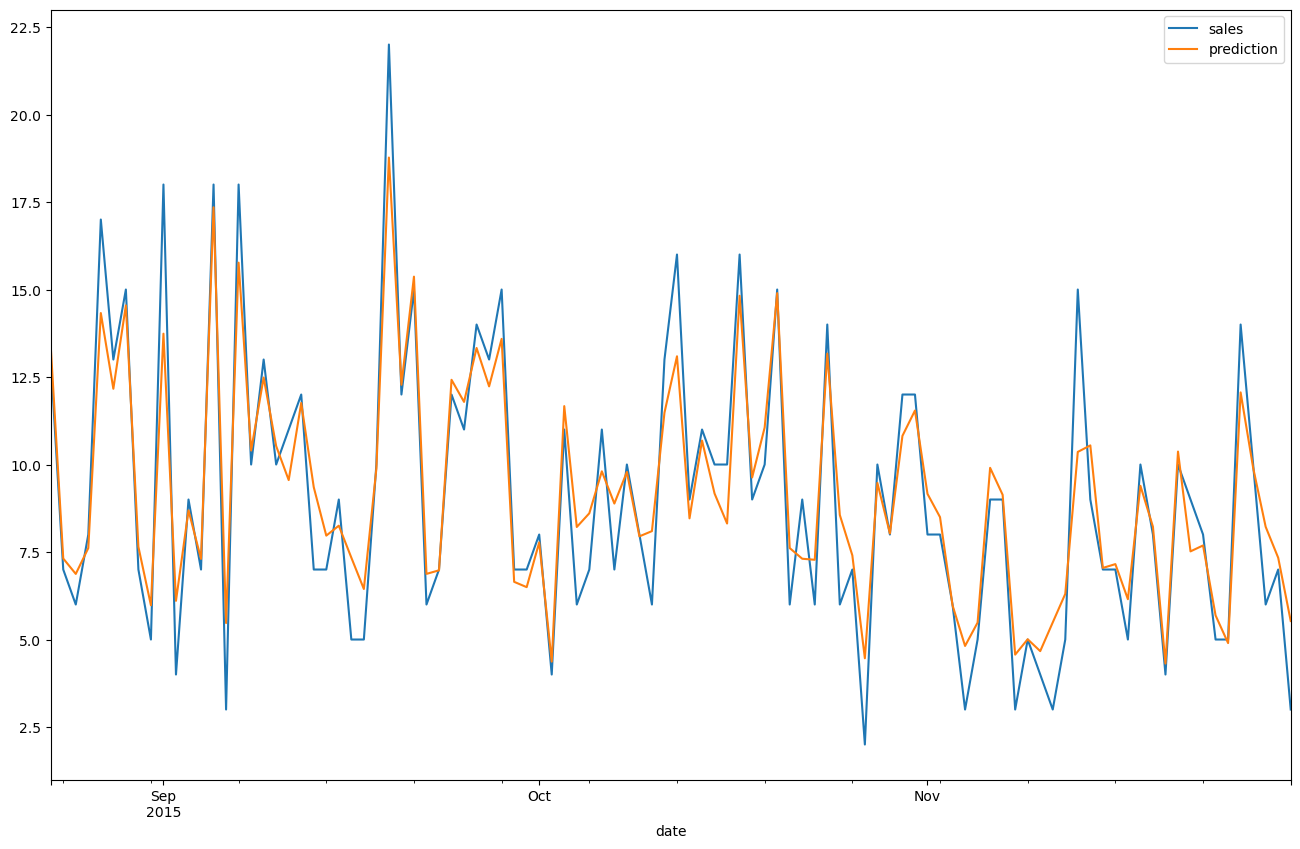

In [52]:
temp.tail(100).plot(figsize = (16,10));

## FOR ALL PRODUCTS

In [66]:
name_x = 'x_selected.pickle'
name_y = 'y_selected.pickle'

In [67]:
x = pd.read_pickle(path + '/02_Data/03_Work/' + name_x)
y = pd.read_pickle(path + '/02_Data/03_Work/' + name_y)

We included the store-product combination as a new variable and removed the original ones.

In [68]:
x.insert(loc=0,column='producto',value=x.store_id + '_'+ x.item_id)
x = x.drop(columns = ['store_id','item_id'])

In order to apply the process on a recurring basis, we are going to create a list where each element is the data of each product.

In [69]:
products = list(x.groupby("producto"))

In [70]:
print(products)

[('CA_3_FOODS_3_090',               producto       date  sales_mm_7  sales_mm_8  sales_mm_6  \
0     CA_3_FOODS_3_090 2013-01-16      236.00      233.38      242.50   
1     CA_3_FOODS_3_090 2013-01-17      235.14      230.38      233.50   
2     CA_3_FOODS_3_090 2013-01-18      224.43      227.00      226.17   
3     CA_3_FOODS_3_090 2013-01-19      225.86      224.38      205.00   
4     CA_3_FOODS_3_090 2013-01-20      227.43      242.88      218.50   
...                ...        ...         ...         ...         ...   
1044  CA_3_FOODS_3_090 2015-11-26      139.43      134.50      151.50   
1045  CA_3_FOODS_3_090 2015-11-27      166.43      154.00      172.67   
1046  CA_3_FOODS_3_090 2015-11-28      157.71      154.12      160.67   
1047  CA_3_FOODS_3_090 2015-11-29      150.43      149.12      156.83   
1048  CA_3_FOODS_3_090 2015-11-30      143.29      139.38      151.33   

      sales_mm_9  sales_mm_2  sales_mm_3  sales_mm_10  sales_mm_5  ...  \
0         228.33      182.0

We encapsulate the individual modeling process in a function, which we will call in each product.

In [77]:
#Recibe los datos de las x y la y de cada producto

def modelling(x_producto, y):
          
    var_model = x_producto.columns.to_list()[2:]

    time_cv = TimeSeriesSplit(3, test_size = 8)
    
    pipe = Pipeline([('algorithm',HistGradientBoostingRegressor())])
    grid = [ 
         {'algorithm': [HistGradientBoostingRegressor()]
#          'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
#          'algoritmo__max_iter': [50,100,200],
#          'algoritmo__max_depth': [5,10,20,50],
#          'algoritmo__scoring': ['neg_mean_absolute_error'],
#          'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]
         }
                       
    ]
           
    #Crea los modelos
    random_search = RandomizedSearchCV(estimator = pipe,
                                   param_distributions = grid, 
                                   n_iter = 1, 
                                   cv = time_cv, 
                                   scoring = 'neg_mean_absolute_error', 
                                   verbose = 0,
                                   n_jobs = -1)
    
    model = random_search.fit(x_producto[var_model],y)
    
    final_model = model.best_estimator_.fit(x_producto[var_model],y)

    return(final_model)

In [78]:
list_models = []

In [79]:
for cada in products:
    producto = cada[0]
    data = cada[1]

    y_cada = y[y.index.isin(data.index)]
    model = modelling(data,y_cada)

    list_models.append((producto,model))
    

In [ ]:
list_models

The goal here is not to assess the quality of the model, since we are not using the training data.

It is simply to check that the process works well and we do not see anything strange before continuing.

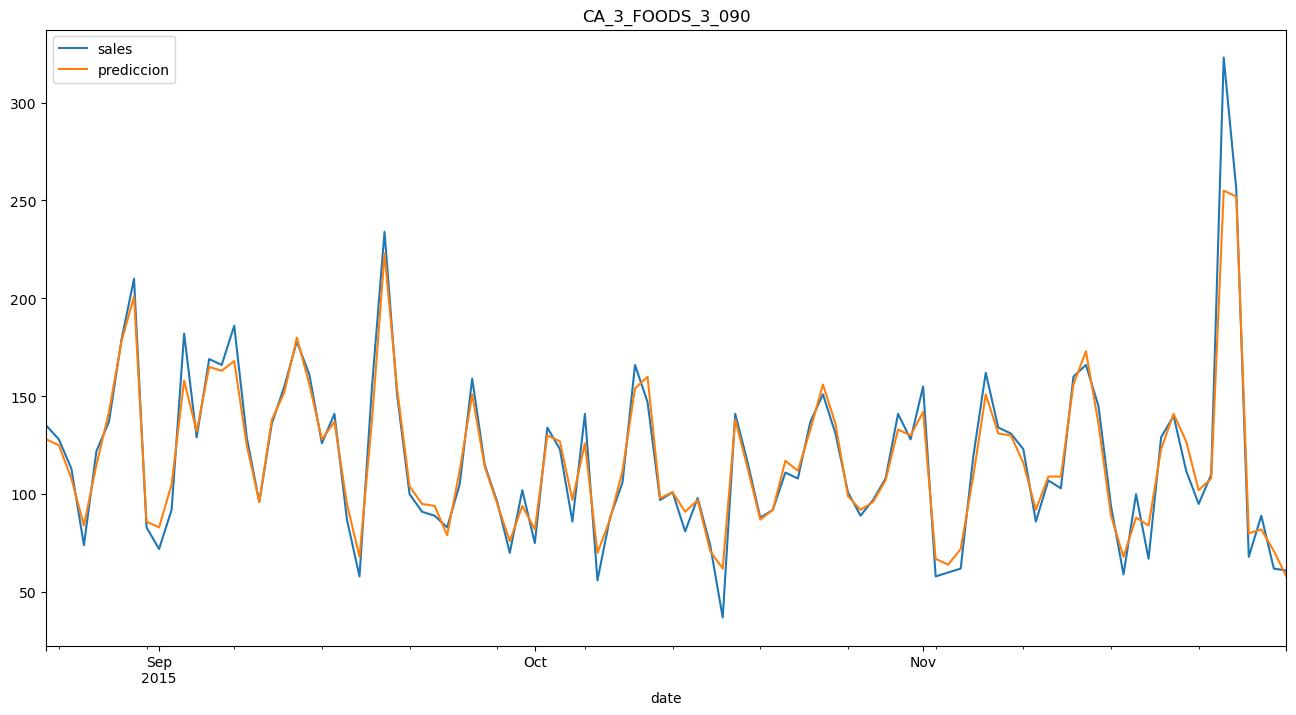

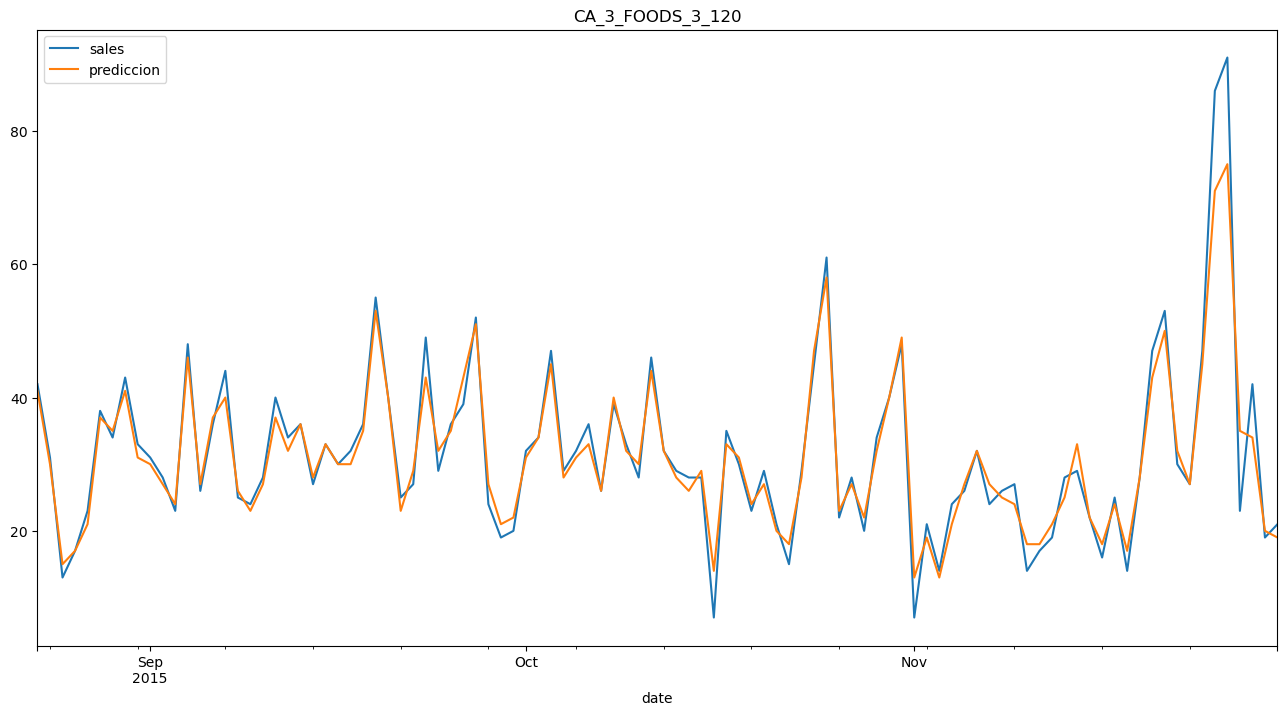

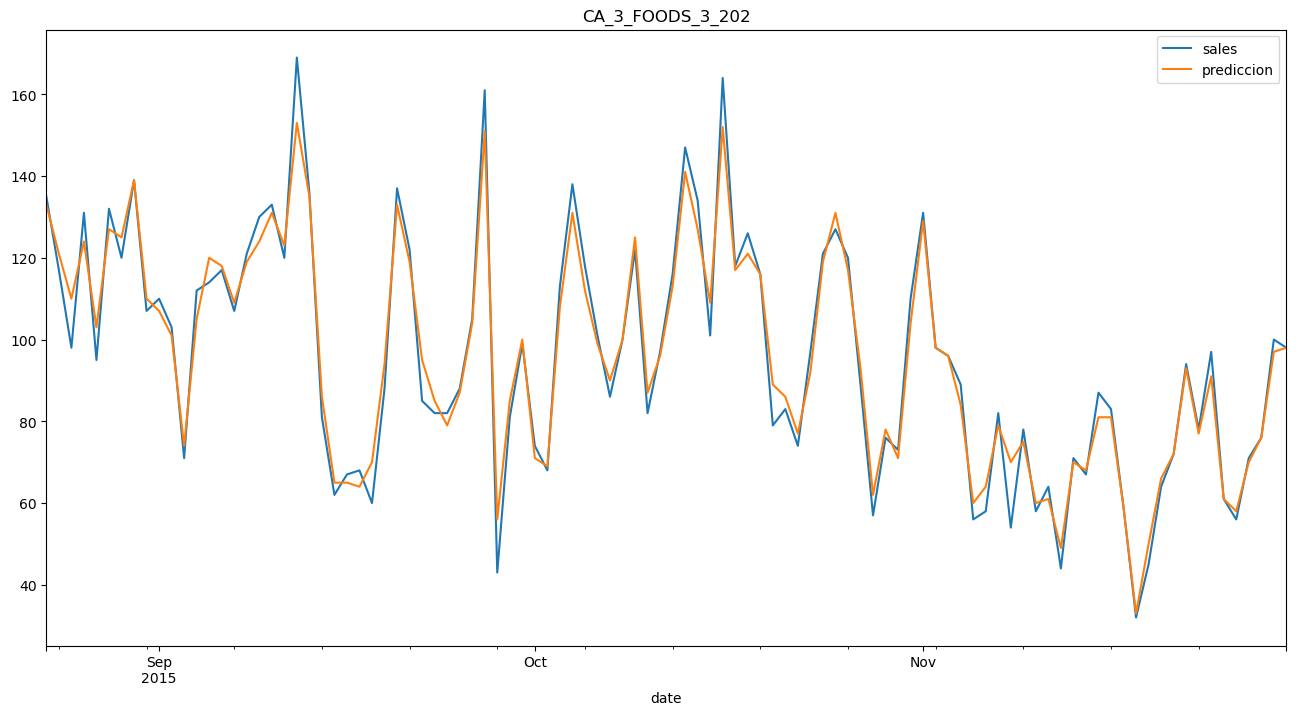

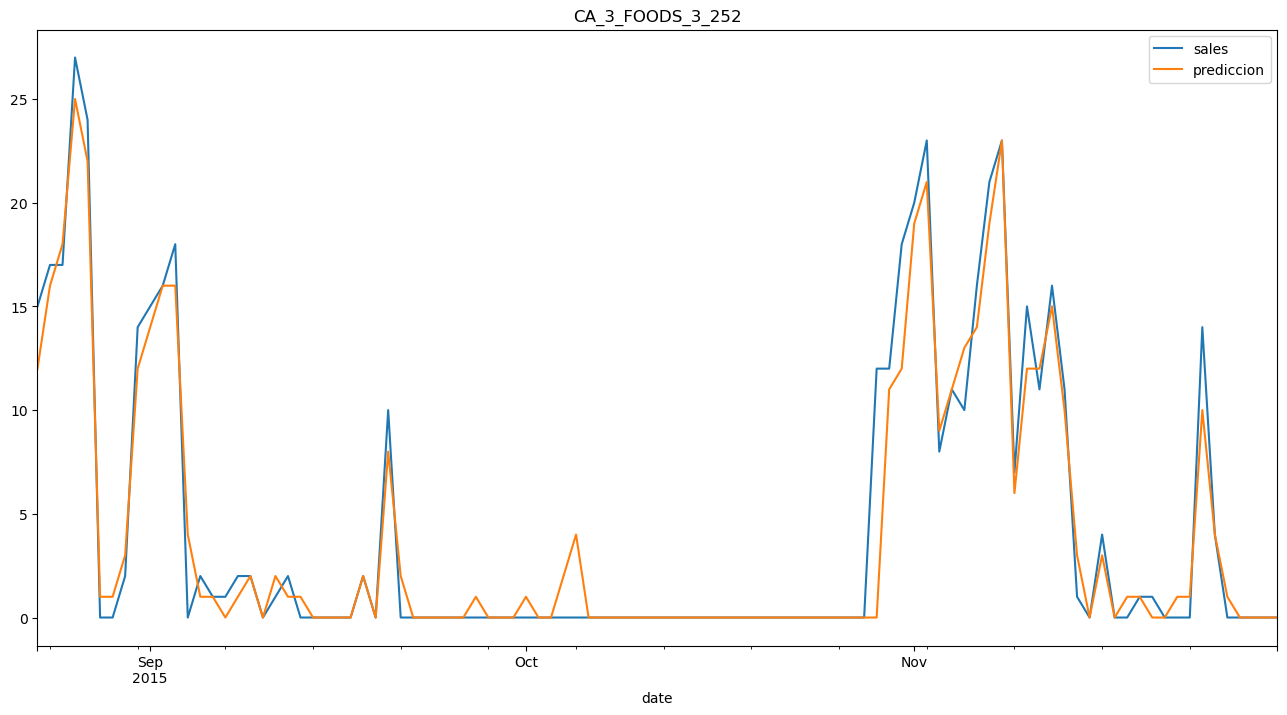

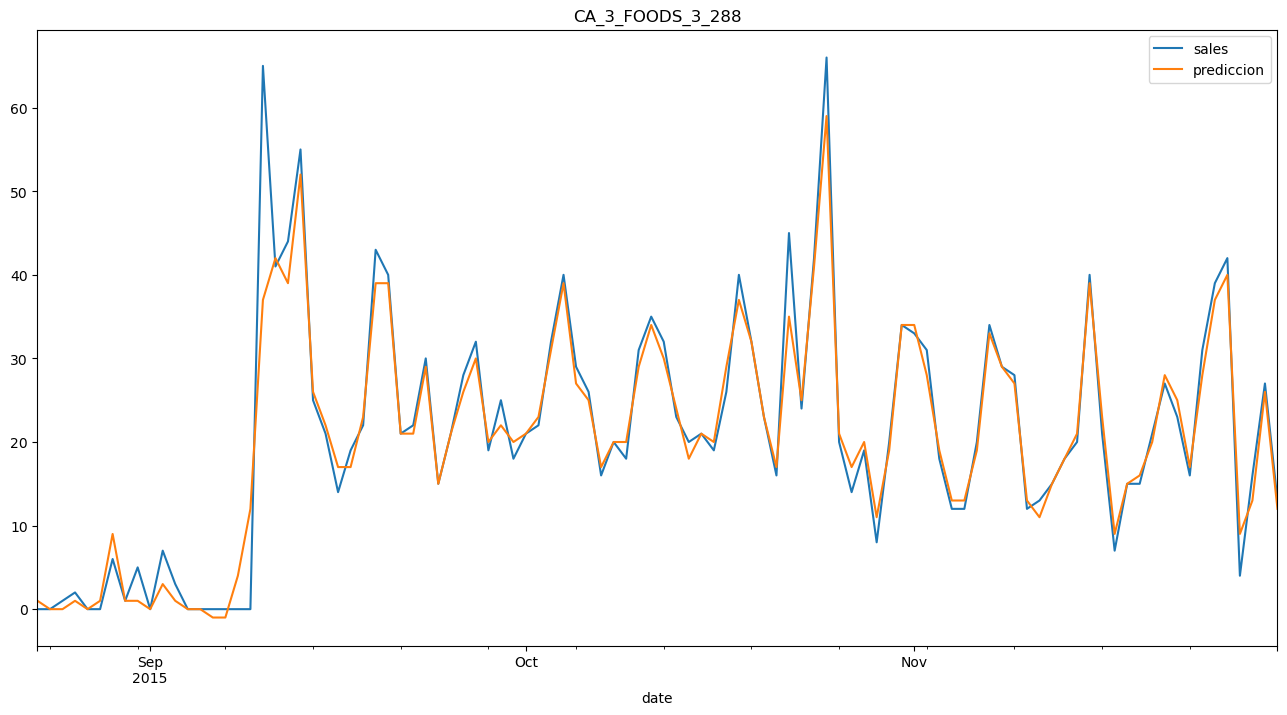

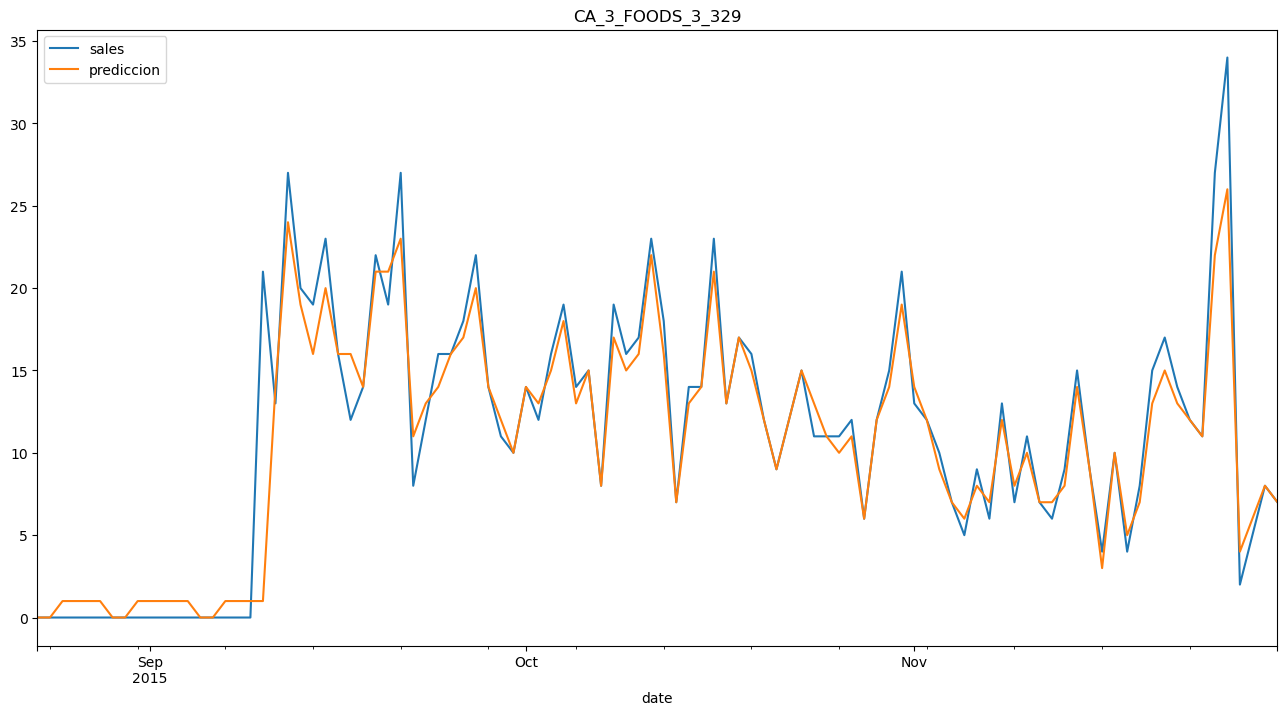

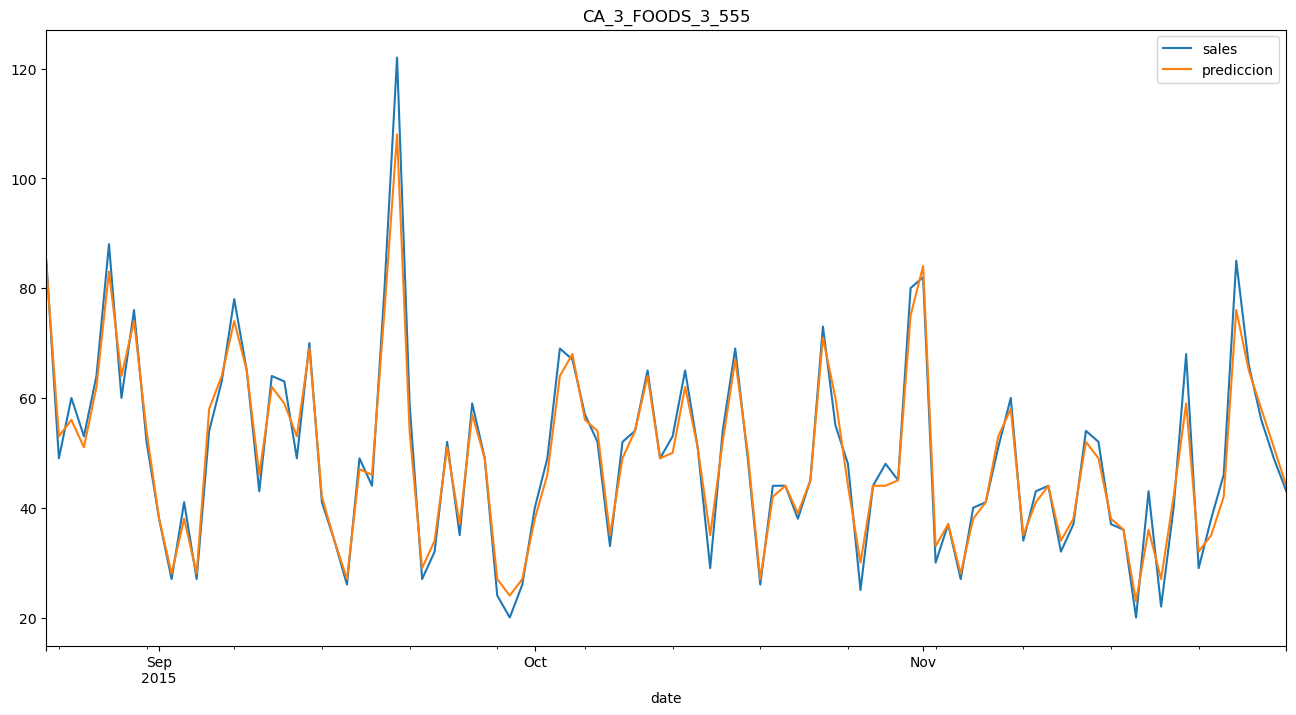

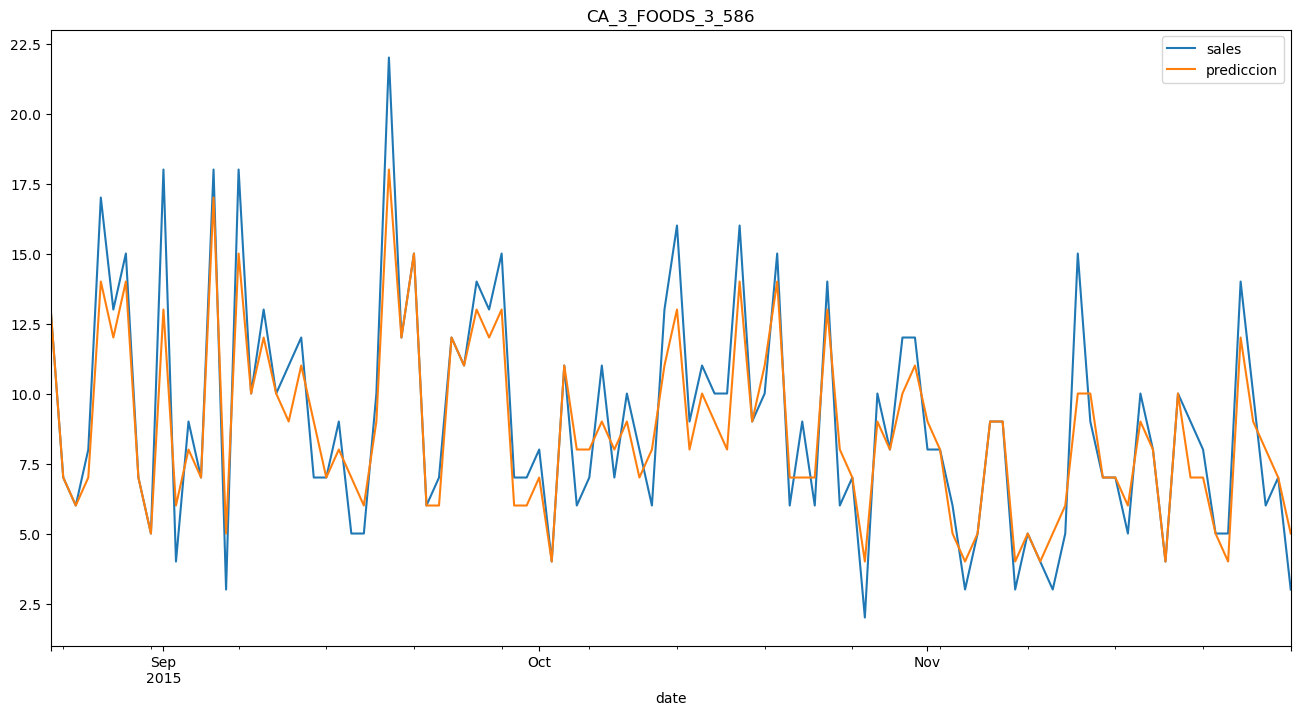

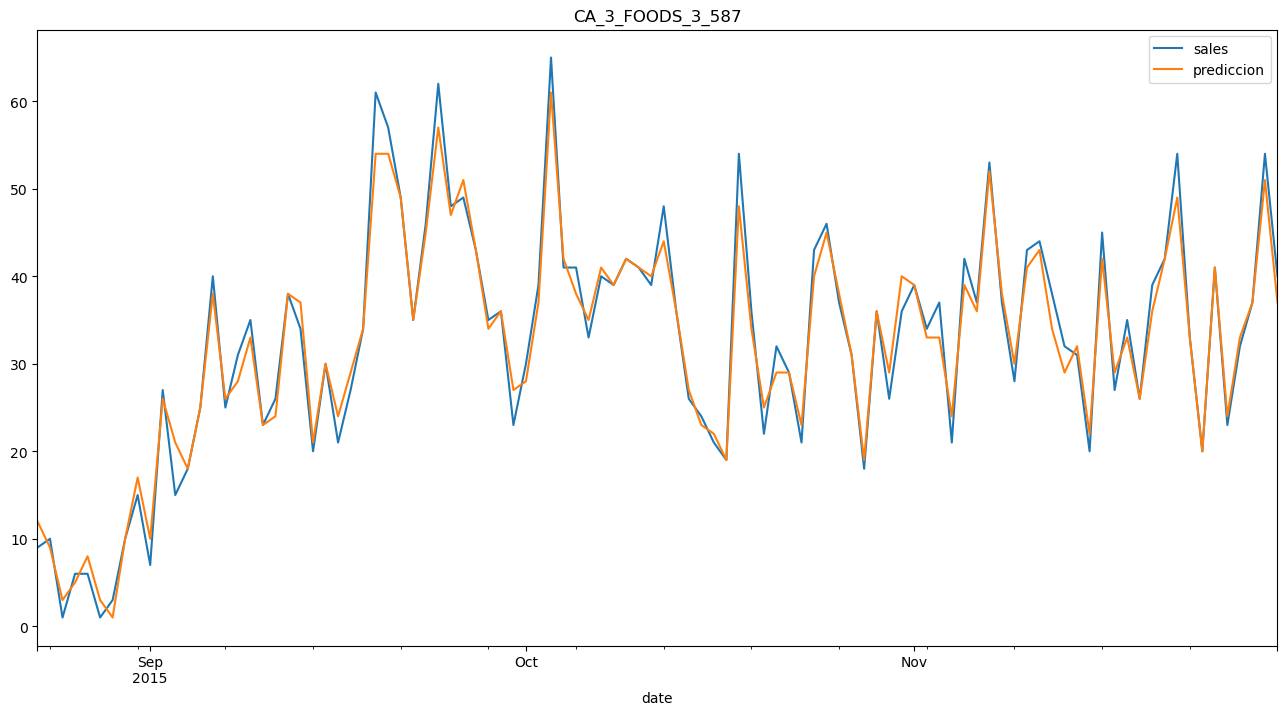

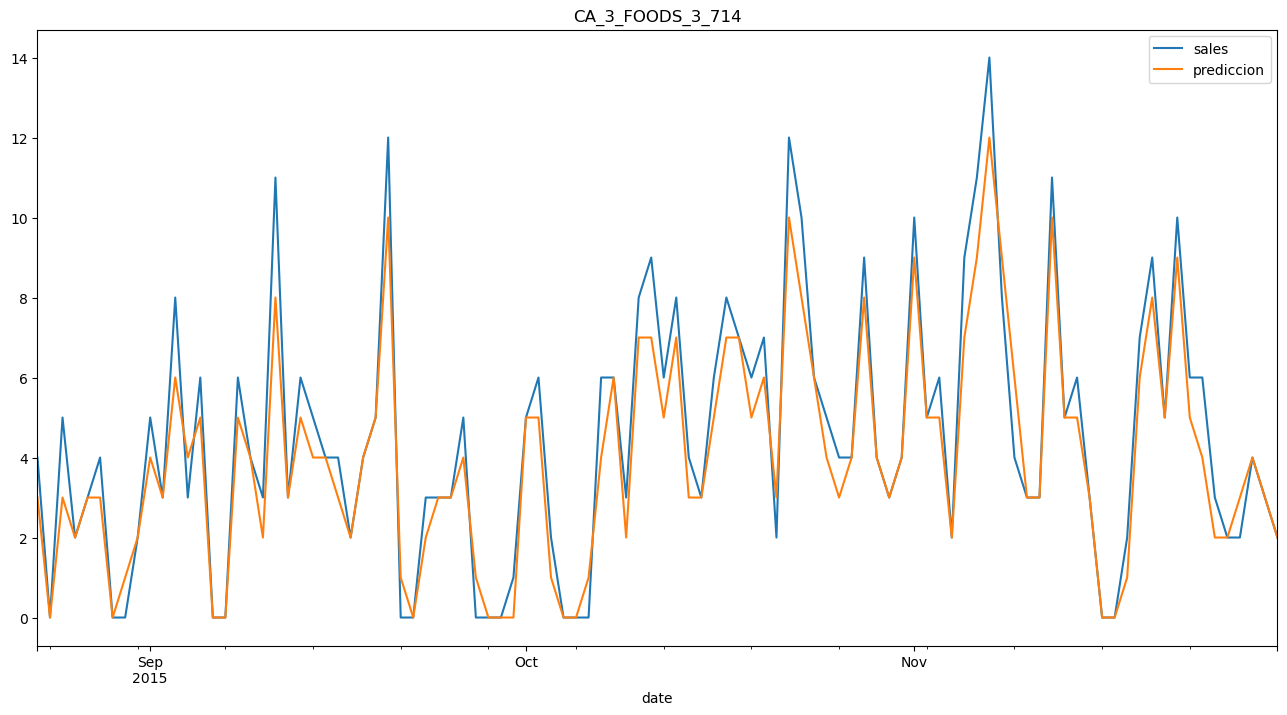

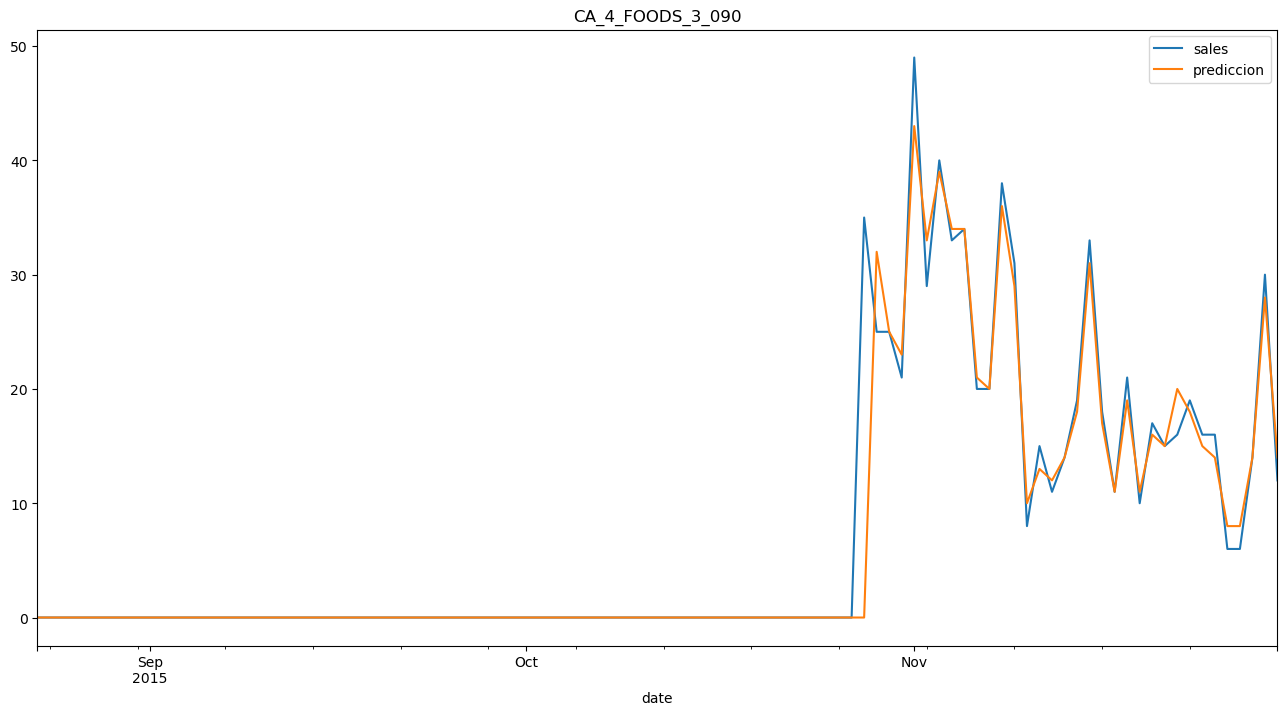

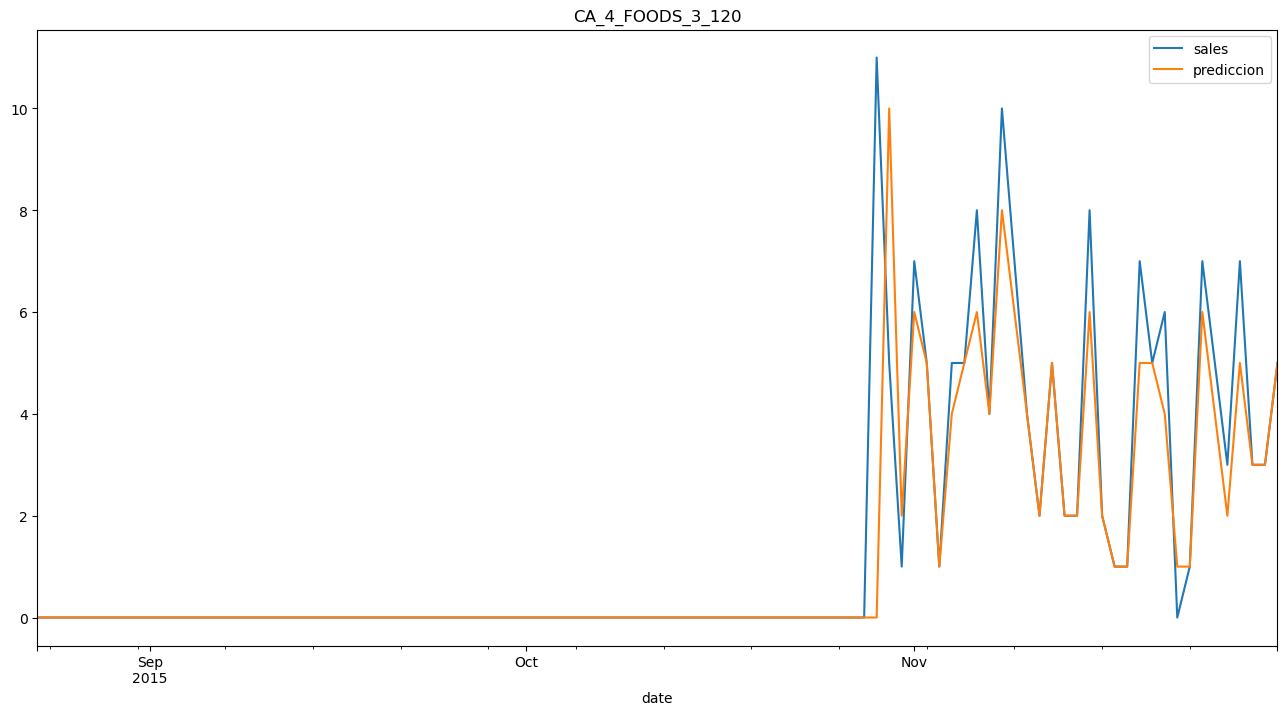

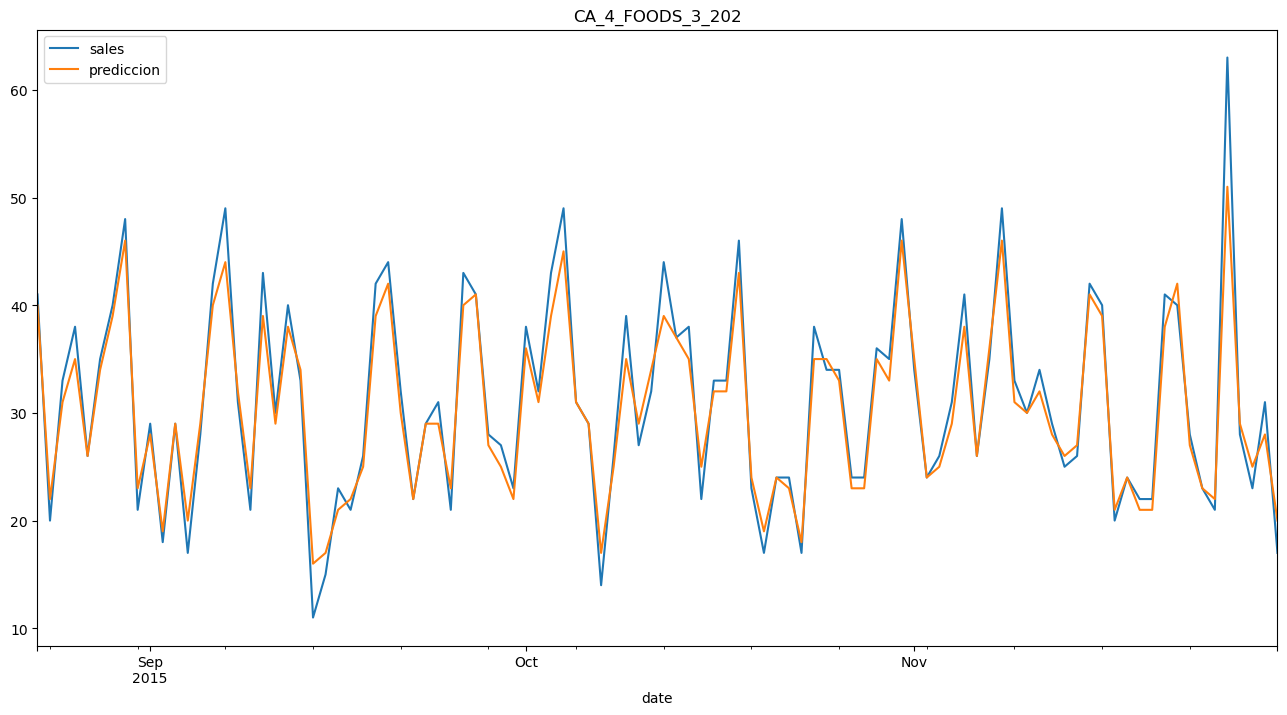

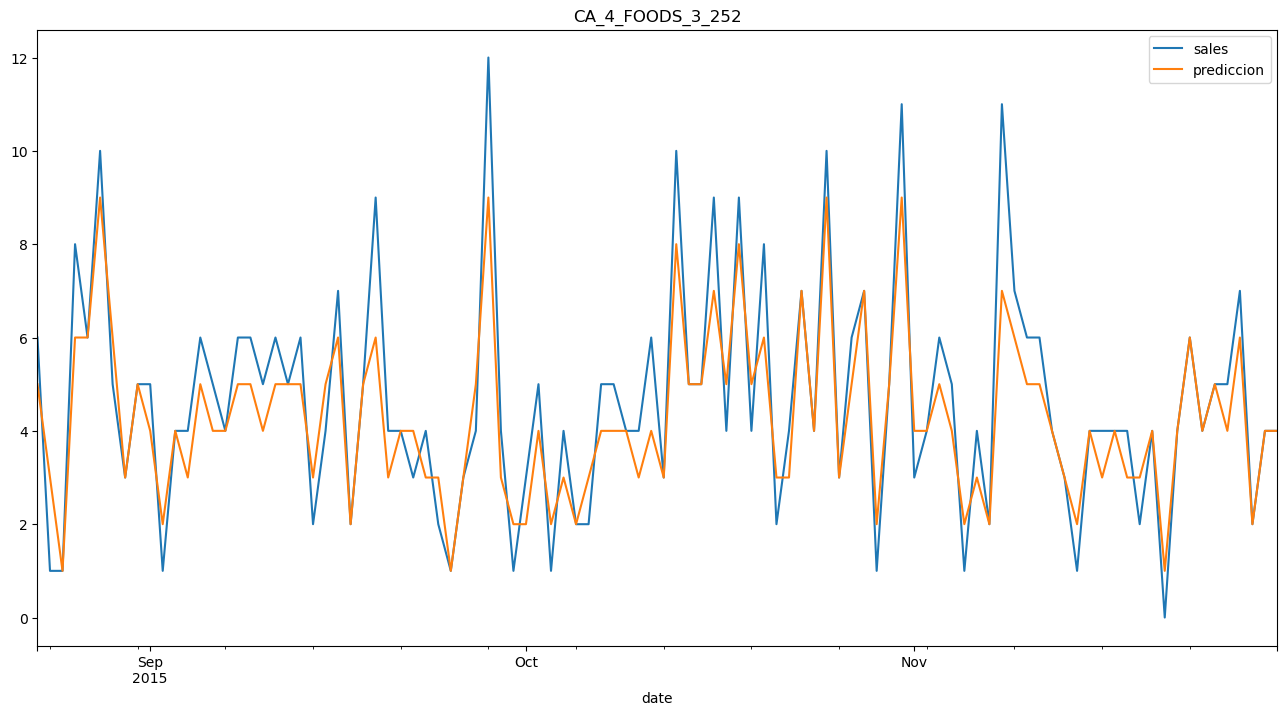

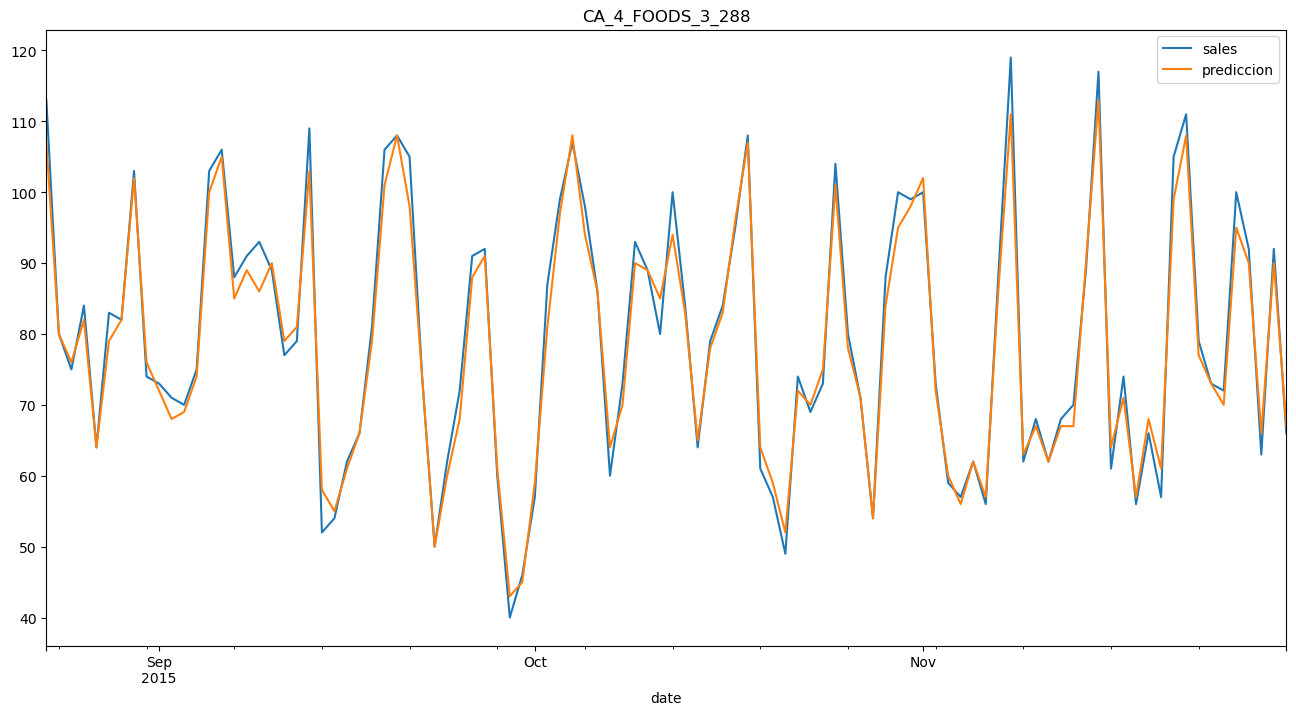

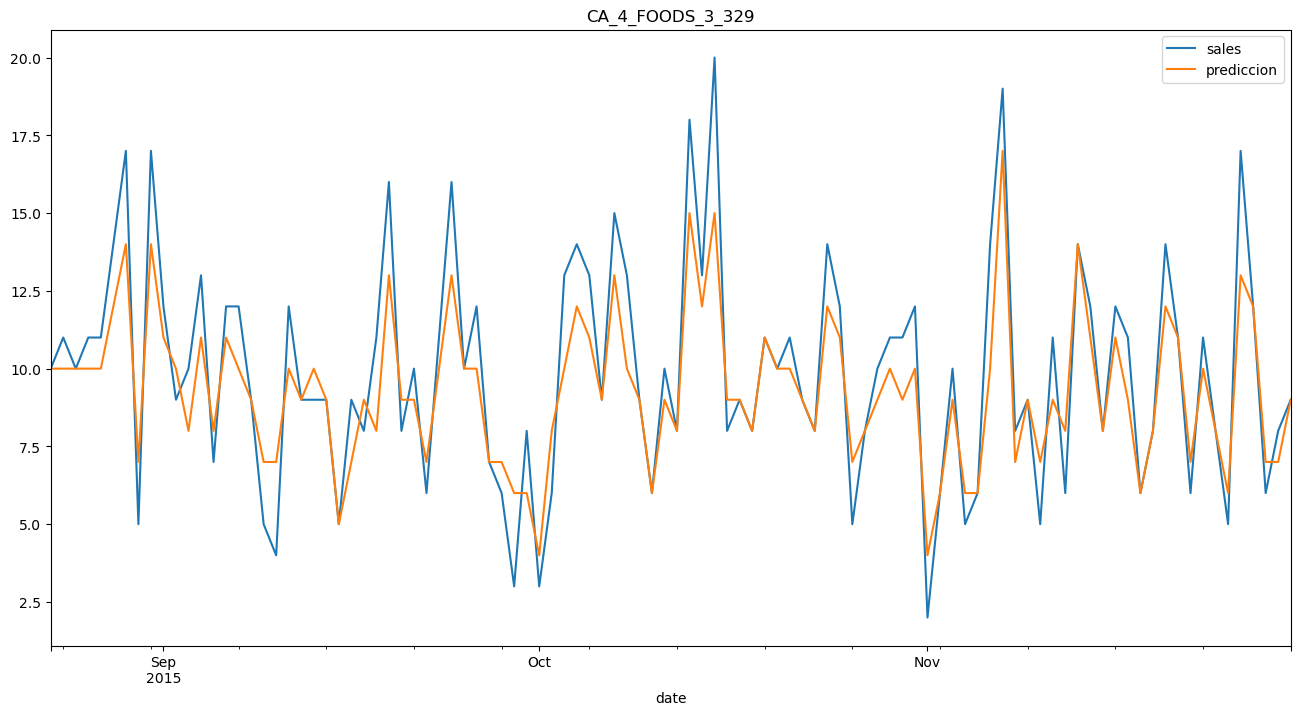

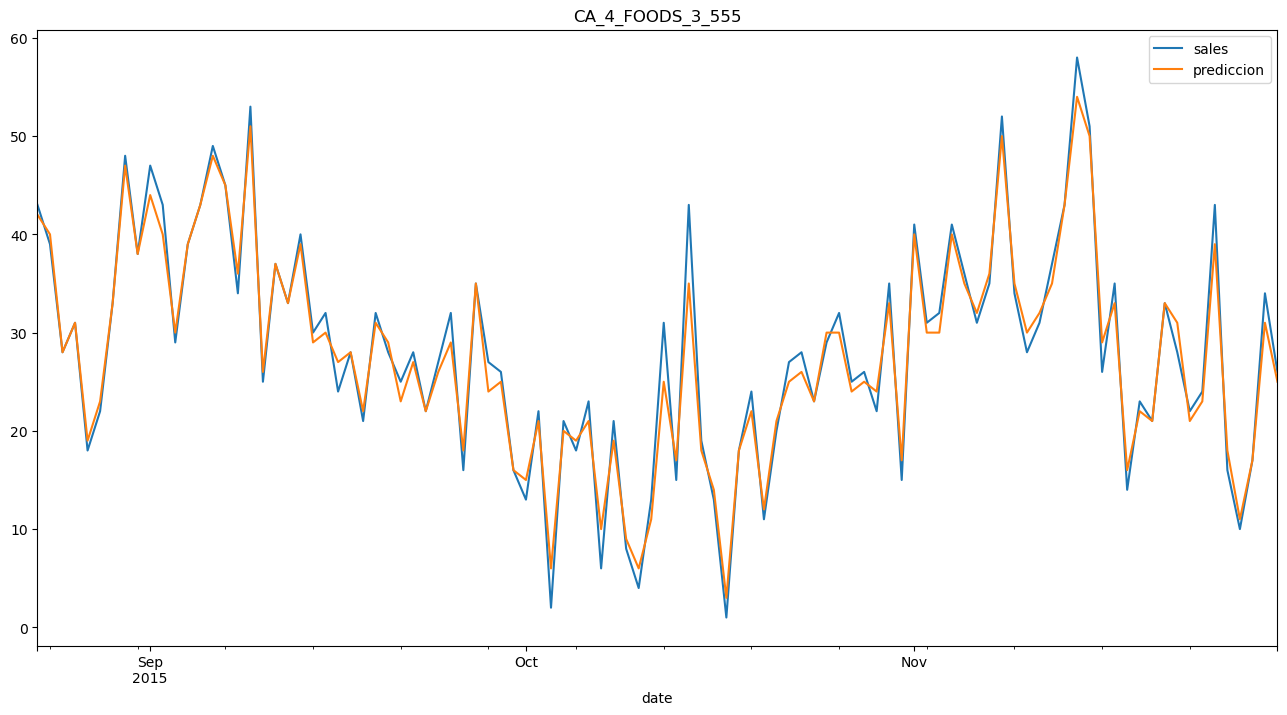

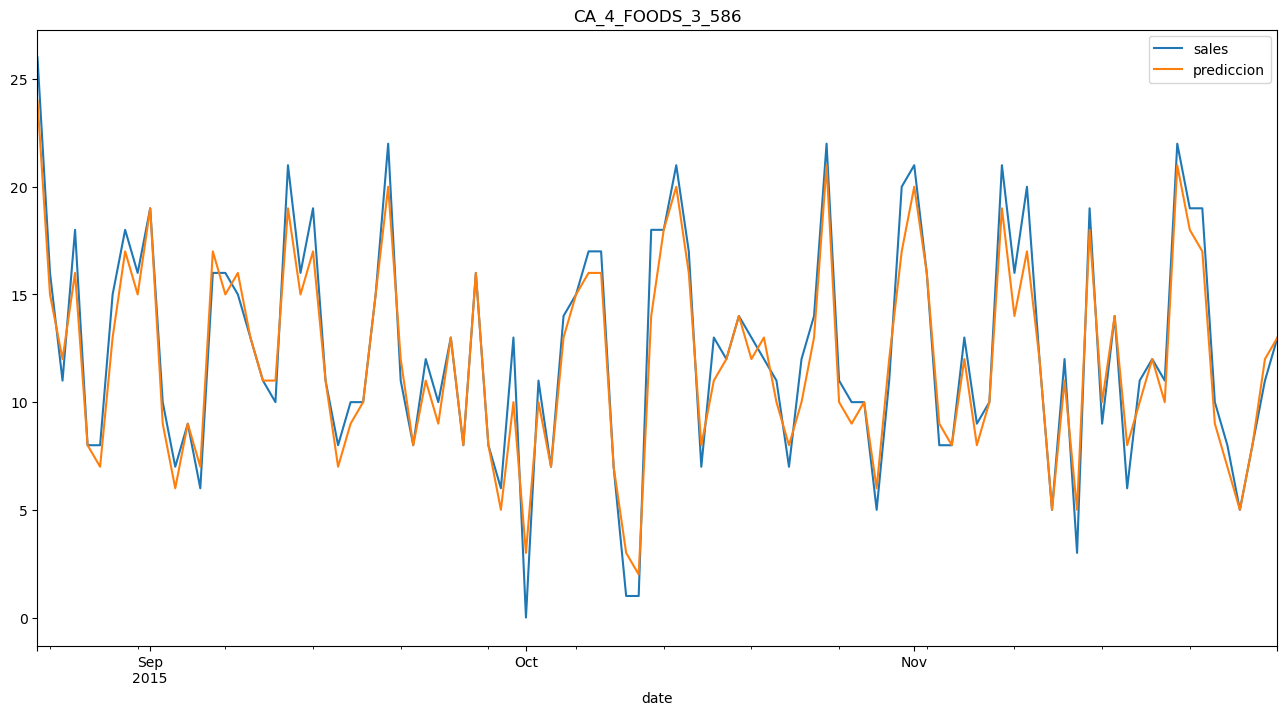

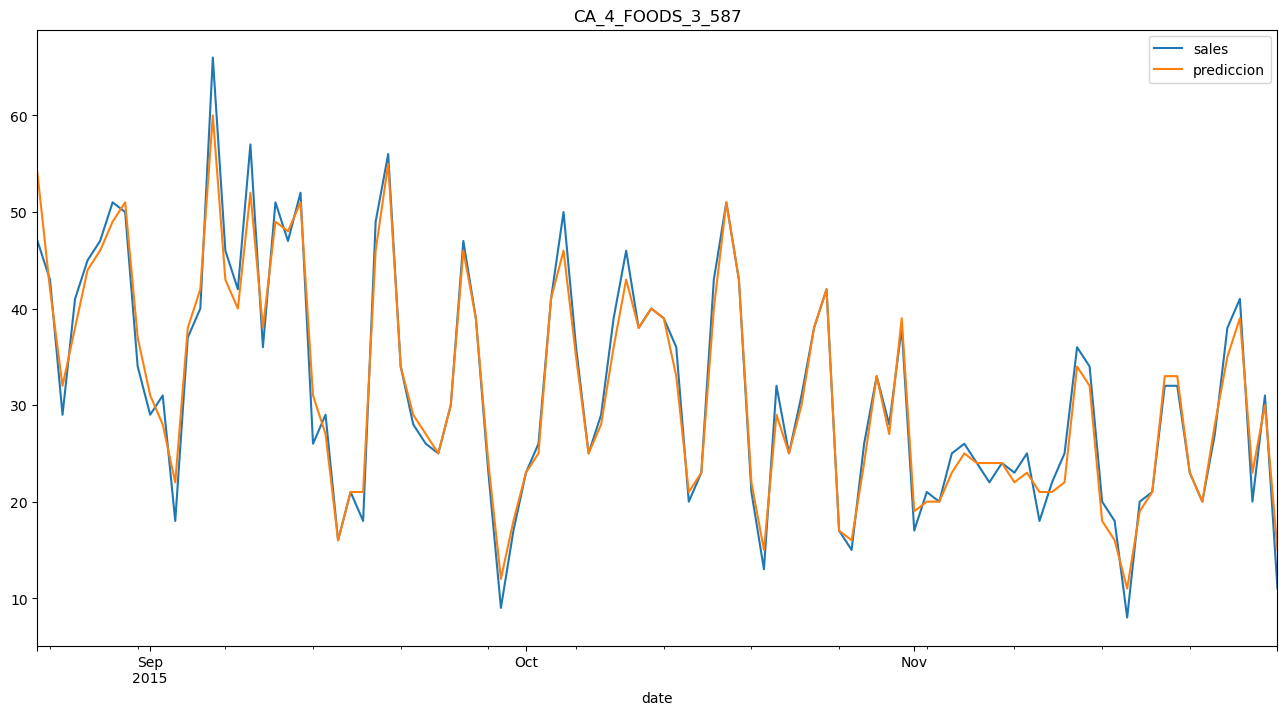

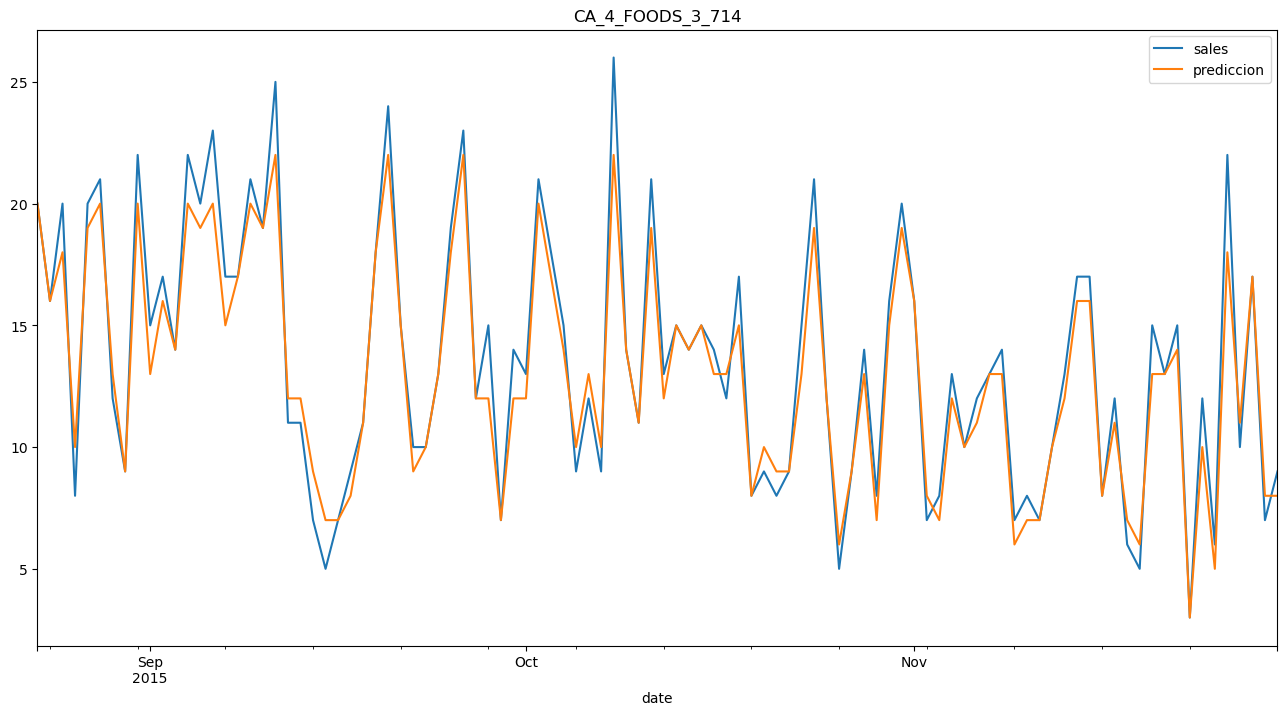

In [81]:
#unificar el df para poder extraer los x e y de cada producto
df =  pd.concat([x,y],axis=1)

for cada in range(0,len(list_models)):
    

    producto = lista_modelos[cada][0]
    modelo = lista_modelos[cada][1]
    variables = modelo[0].feature_names_in_
    target = 'sales'
  
    x_prod = df.loc[df.producto == producto].drop(columns=target).copy()
    y_prod = df.loc[df.producto == producto,'sales'].copy()
    date = x_prod.date.values
    
    predicciones = pd.DataFrame(data={'date': date,
                                      'producto': producto,
                                      'sales': y_prod,
                                      'prediccion': modelo.predict(x_prod[variables])})

    predicciones['prediccion'] = predicciones.prediccion.astype('int')
    predicciones.set_index('date',inplace=True)

    predicciones.tail(100).plot(figsize = (16,8),title = producto);